## **Problem 2: Metropolis-Hastings**

- LOs: #PythonImplementation, #CodeReadability

Your task is to generate samples from a 2-dimensional probability distribution using the Metropolis-Hastings sampling algorithm.

- Implement the Metropolis-Hastings algorithm.
- Explain what your proposal distribution is and why you chose it.
- Explain the output from the algorithm, including how long it takes to reach equilibrium and how many steps you take between samples (and why).

The normalization constant of the distribution is not known. Use the Python function below to compute the unnormalized distribution.



```
def unnormalized_distribution(x, y):
    
    from numpy import arctan2, pi
    from scipy.stats import norm

    measurements = [2.349080, -1.276010, -2.081865]
    buoys = [[-2.5, 2], [2, -5], [-3, -4]]
    sigma = 10/180*pi
    posterior = 1

    for i in range(3):
        bearing = arctan2(buoys[i][1] - y, buoys[i][0] - x)
        difference = (bearing - measurements[i] + pi) % (2 * pi) - pi
        posterior *= norm.pdf(difference, loc=0, scale=sigma)

    return posterior
```

For context, this distribution arises from the following Bayesian inference problem.

You are on a boat and measure your bearings (directions) to 3 buoys. Your measurements are not very accurate and the error in the measured direction in degrees is $\text{Normal}(0, 10^2)$ $–$ so a standard deviation of $10$ degrees. Use the known locations of the buoys and your $3$ noisy measurements to determine where you are on the sea.

The figure to the right shows the locations of the $3$ buoys, the noisy directions measured from the location of the boat to those buoys, and the posterior distribution over the boat’s location (calculated by the Python function above) from which you need to generate samples.

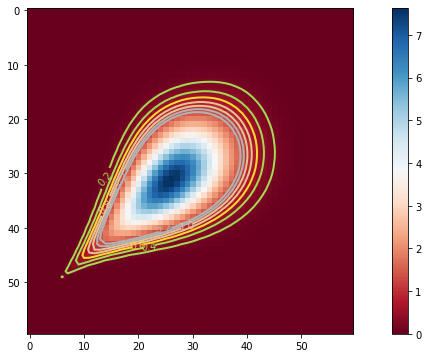

In [14]:
# import relevant libraries for numpy operations and 3-d plotting
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# here target_distribution is the given unnormalized_distribution
def target_distribution(x, y):

    from numpy import arctan2, pi
    from scipy.stats import norm

    measurements = [2.349080, -1.276010, -2.081865] # measurements taken 
    buoys = [[-2.5, 2], [2, -5], [-3, -4]] # positions of the buoys
    sigma = 10/180*pi # evaluating sigma value
    posterior = 1

    # iterate through the number of buoys (3)
    for i in range(3):
        # evaluate for the bearing (direction) for each buoy
        bearing = arctan2(buoys[i][1] - y, buoys[i][0] - x)
        difference = (bearing - measurements[i] + pi) % (2 * pi) - pi
        # obtain posterior from norm.pdf given params
        posterior *= norm.pdf(difference, loc=0, scale=sigma)
    
    return posterior
    
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)

X,Y = meshgrid(x, y)
Z = target_distribution(X, Y) # evaluates the target distribution on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function

# adds Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)

clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

colorbar(im) # adds colobar on the right

show()

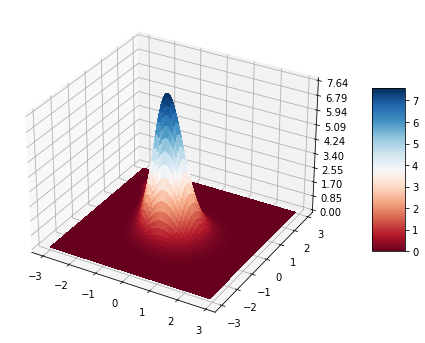

In [15]:
# importing 3-d plotting tools from matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.RdBu, linewidth = 0, antialiased = False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [16]:
# importing libraries for plotting and numpy, scipy operations
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

# target density function is the same as unnormalized_distribution
def target_density(x):

    from numpy import arctan2, pi
    from scipy.stats import norm

    y = np.random.normal(0, 2)

    measurements = [2.349080, -1.276010, -2.081865] # measurements taken
    buoys = [[-2.5, 2], [2, -5], [-3, -4]] # positions of the buoys
    sigma = 10/180*pi # evaluating sigma value
    posterior = 1

    # iterate through the number of buoys
    for i in range(3):
        # evaluate for the bearing (direction) for each buoy
        bearing = arctan2(buoys[i][1] - y, buoys[i][0] - x)
        # evaluate the difference 
        difference = (bearing - measurements[i] + pi) % (2 * pi) - pi
        # obtain posterior from norm.pdf given params
        posterior *= norm.pdf(difference, loc=0, scale=sigma)
    
    return posterior

In [17]:
# defining a proposal function for the algorithm
def proposal_function(x, scale):
    return [np.random.normal(x[0], scale), np.random.normal(x[1], scale)]

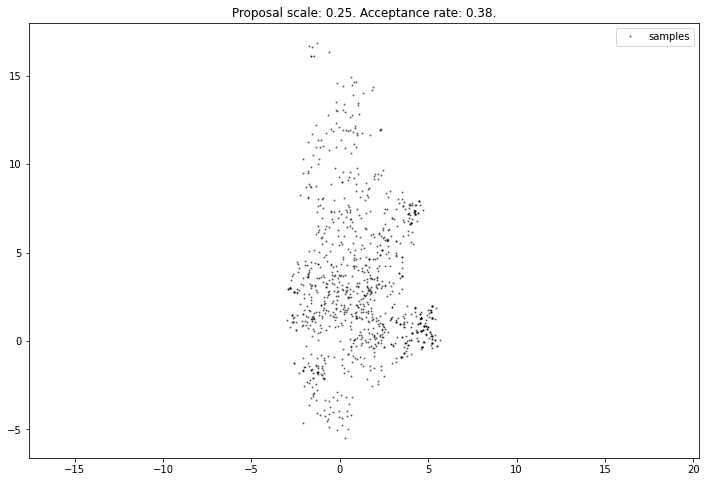

In [22]:
proposal_scale = 0.25  # positive real number

total_samples = 1000
steps_between_samples = 10
total_steps = total_samples * steps_between_samples

state = np.empty((total_steps + 1, 2))
state[0,:] = [0,0]
accepted = 0 # initialize counter for the accepted 

# iterate through the total_steps
for step in range(total_steps):
    
    # evaluates proposal from the proposal function given params
    proposal = proposal_function(state[step], scale = proposal_scale)
    p = min(1, target_density(proposal[0]) / target_density(state[step].any()))
    
    if np.random.uniform(0, 1) < p:
        
        state[step + 1] = proposal
        # state is accepted so it increases counter
        accepted += 1
        
    else:
        
        state[step + 1] = state[step] # succeding step becomes the step

# plotting figure for the results
plt.figure(figsize = (12, 8))

plt.plot(state[1::steps_between_samples, 0],
         state[1::steps_between_samples, 1],
         'k.', markersize = 2, alpha = 0.5,
         label = 'samples')

plt.title(f'Proposal scale: {proposal_scale}. Acceptance rate: {accepted / total_steps:.2f}.')
plt.axis('equal')
plt.legend()
plt.show()